## Predict California Housing Price with Machine Learning Models

This is a data analytics project that I've conducted to develop my skills and knowledge in data analytics using Python. In this project, I've done some Exploratory Data Analysis (EDA) and regression type of machine learning to predict median house value from the selected features.

Note: this notebook run in my anaconda environment.

## Check and install package

In [8]:
!conda list

# packages in environment at C:\Users\acer\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.05                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        2.0.3                    py38_0  
anaconda-project          0.9.1              pyhd3eb1b0_1  
anyio                     2.2.0            py38haa95532_2  
appdirs                   1.4.4                      py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38h2bbff1b_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.5              py38haa95532_1  
astropy                   4.2.1            py38h2bbff1b_1  
async_generator           1.10               pyhd3eb1b0_0  
atomicwrites              1.4.0      

In [7]:
# The datasource comes from kaggle
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=dd0d268ad1a57ed2e8b5a0cc34c0dd027a84892e9218b75efd0cbadeecf5800c
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [1]:
# Install plotly
!pip install plotly

In [4]:
# Install dash to create an interactive web apps
!pip install dash

  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3803 sha256=45dc1e514216591f46ede8cf2ccc381ea168d6689403af36794c54ec2e405d95
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\52\e4\f3\16724791571a955a46d54650510c98c04ab7d339626aee27cc
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4071 sha256=3145ba44a135a57f9da36d1424226f64cf7da126e3101523fea73e156ec47ca6
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\73\d8\8d\92f612c03c895f19bcc56a6c54be7bb41aaa698012a5624f60
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3896 sha256=5bc0fa0c3b962457d2eb43e20c7f51b7d941582acca71f525979e4548be9444b
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\a6\fb\f5\4adf241f384634f52028f15eab6a325e77b8766a0a00816bbf
Successfully built dash-core-components dash-html-components dash-table


In [84]:
# Install lightgmb
!pip install lightgbm

In [38]:
# Install shap
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [22]:
# Installing XGBoost
!pip install xgboost

## Download the kaggle dataset

In this project, I'm using california housing prices from [camnugent/california-housing-prices](https://www.kaggle.com/camnugent/california-housing-prices) dataset from kaggle API. The data contains information from the 1990 California census. There are 10 columns in the dataset, which are:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

Note: w.r.t = with respect to

In [ ]:
# Download the data from kaggle
!mkdir .kaggle
!cd downloads
!move kaggle.json C:/Users/acer/.kaggle
!cd /Users/acer
!kaggle datasets download -d camnugent/california-housing-prices

From there I've moved the data manually to my project directory and extract the zip file.

## Import Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import shap
import xgboost as xgb
from statsmodels.stats.descriptivestats import Description
from scipy.stats import shapiro, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMRegressor

## Data Preparation

In [3]:
# Check the current directory
print(os.getcwd())

d:\DATA SCIENCE PROJECT\PYTHON - HOUSING PRICES\Code


I've saved the data in another folder so I need to use the exact path for importing the data.

In [2]:
# Import data
housing_data = pd.read_csv("D:\DATA SCIENCE PROJECT\PYTHON - HOUSING PRICES\Data\housing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


There are 20640 rows and 10 columns in the data frame.

In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There is one column that consist of categorical value which is 'ocean_proximity'. For further analysis, this column will be tranformed into dummies variable.

In [8]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

ocen_proximity column consist of five categorical values with the "1< OCEAN" category as the highest number of observations that occured.

In [33]:
# Check if there is some missing values
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_bedrooms column has 207 missing values, otherwise there's no missing values.

In [3]:
# Creating a shuffled dataset so we could have broader view of the data and get rid of ordered data
housing_shuffled = housing_data.sample(n = len(housing_data), random_state = 1)
housing_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [10]:
# Get dummies variable from the ocean proximity
pd.get_dummies(housing_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [4]:
# Creating a new data frame with dummies variables
housing_shuffled = pd.concat([housing_shuffled.drop('ocean_proximity', axis = 1), pd.get_dummies(housing_shuffled['ocean_proximity'])], axis = 1)
housing_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0


In [5]:
# Organize the median_house_value to be in the last column of the data frame
temp = housing_shuffled['median_house_value']
housing_shuffled = pd.concat([housing_shuffled.drop('median_house_value', axis = 1), temp], axis = 1)
housing_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0


In [13]:
housing_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 4712 to 235
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   <1H OCEAN           20640 non-null  uint8  
 9   INLAND              20640 non-null  uint8  
 10  ISLAND              20640 non-null  uint8  
 11  NEAR BAY            20640 non-null  uint8  
 12  NEAR OCEAN          20640 non-null  uint8  
 13  median_house_value  20640 non-null  float64
dtypes: float64(9), uint8(5)
memory usage: 1.7 MB


The categorical values has been converted successfully into dummies variables.

In [6]:
# Drop observation with missing value
before = len(housing_shuffled)
print(before) # Before

housing_shuffled = housing_shuffled.dropna()
print(len(housing_shuffled)) # After
print("The difference by dropping NAs is", before - len(housing_shuffled))

20640
20433
The difference by dropping NAs is 207


By dropping rows that consist of NA values, we can see that it reduce the number of rows by 207 from 20640 to 20433. It's not a big difference for the number of rows from original data frame to the number of rows from the dropped NAs data frame.

# Goals

Goals of this analysis consist of:

1. Knowing the pattern between target variable (median_housing_value) with its features.
2. Choosing the features that well explain the pattern to the target variable.
3. Apply machine learning models to predict the target variable.

# Exploratory Data Analysis (EDA)

## EDA for Continuous Variables

In [26]:
display_order = [
    "median_house_value",
    *housing_shuffled.columns.drop(["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN", "median_house_value"])
    ]
print(display_order)

['median_house_value', 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [27]:
plot_df = housing_shuffled[display_order]
plot_df.head()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4712,355000.0,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500
2151,70700.0,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784
15927,229400.0,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132
82,112500.0,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208
8161,225400.0,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795


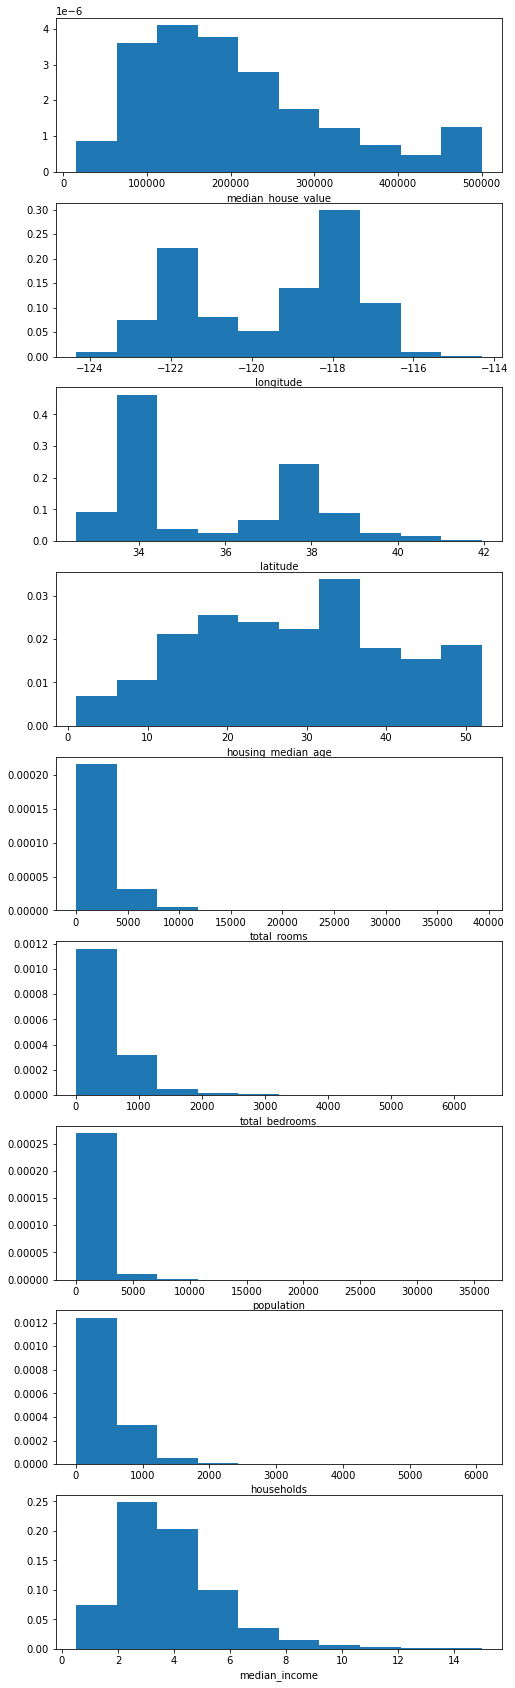

In [28]:
# Check the distribution of each continuous variables using histogram
fig, ax = plt.subplots(nrows = len(display_order), figsize = (8, 30))

for r in range(len(display_order)):
    ax[r].hist(plot_df[display_order[r]], bins = 10, density = True)
    ax[r].set_xlabel(display_order[r])

plt.show()

As you can see from histogram above that there are no exact "bell-shape" from the continuous variable. Then, we'll do some hypothesis testing to check whether the data has normal distribution or not using jarque-bera method.

In [29]:
# Normality test using jarque bera method
descriptive = Description(plot_df)
descriptive.numeric.loc['jarque_bera_pval']

median_house_value     0.000000e+00
longitude              0.000000e+00
latitude               0.000000e+00
housing_median_age    3.514138e-122
total_rooms            0.000000e+00
total_bedrooms         0.000000e+00
population             0.000000e+00
households             0.000000e+00
median_income          0.000000e+00
Name: jarque_bera_pval, dtype: float64

All of the jarque bera p-value seems to be below the significance level of 5%. So, all the continuous variables are not normal distribute. Because of that, we need to use nonparametric approach to calculate the correlation between those continuous variables. The method that will be used is **spearman correlation**.

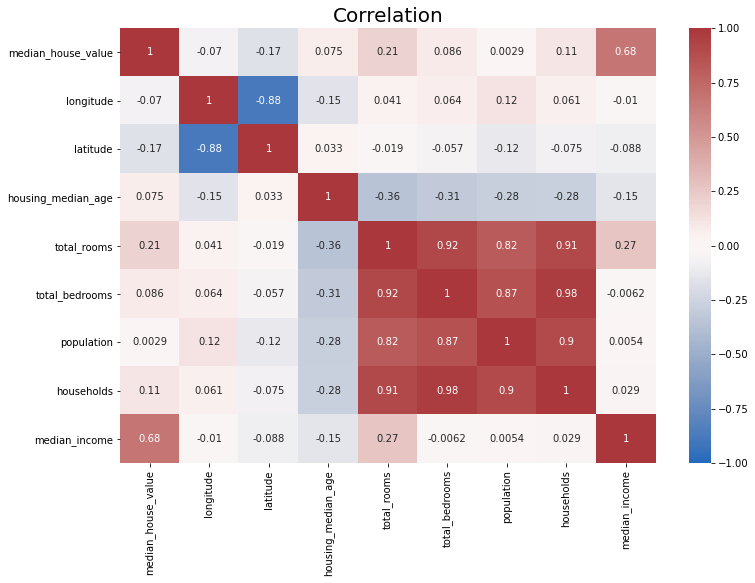

In [30]:
# Creating a heatmap to get the information about correlation value between continuous variables
plt.figure(figsize = (12, 8))
sns.heatmap(plot_df.corr(method = "spearman"), vmin = -1, vmax = 1, center = 0, annot = True, cmap = "vlag")
plt.title("Correlation", fontsize = 20)
plt.show()

The correlation method used was spearman correlation, because the data isn't normal distribute. From the correlation heatmap we can see that there are indication of multicollinearity between "total_rooms", "total_bedrooms", "population", and "households" with relatively high correlation value. Because of that, we need to choose one variable from those four variables. Latitude and longitude also have high correlation, it's obvious because they are related in geographic term.

In [31]:
# Prepare the data to create heatmap for pval-cor-test
pval_cor = {}
for col in range(len(plot_df.columns)):
  col_pval = []
  for row in range(len(plot_df.columns)):
    stat, pval = spearmanr(list(plot_df[plot_df.columns[col]]), list(plot_df[plot_df.columns[row]]))
    col_pval.append(round(pval, 2))
  pval_cor[plot_df.columns[col]] = col_pval

pval_cor = pd.DataFrame(pval_cor)
pval_cor = pval_cor.set_index(pval_cor.columns)
pval_cor

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
median_house_value,0.00,0.00,0.00,0.0,0.00,0.00,0.68,0.0,0.00
longitude,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.14
latitude,0.00,0.00,0.00,0.0,0.01,0.00,0.00,0.0,0.00
housing_median_age,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
total_rooms,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.0,0.00
total_bedrooms,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.38
population,0.68,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.44
households,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
median_income,0.00,0.14,0.00,0.0,0.00,0.38,0.44,0.0,0.00


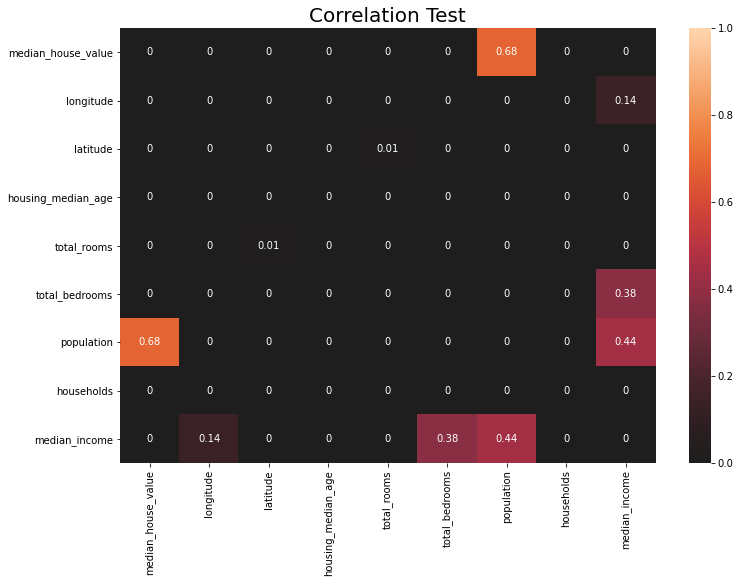

In [32]:
# Creating a spearman correlation p-value test with heatmap visualization
plt.figure(figsize = (12,8))
sns.heatmap(pval_cor, vmin = 0, vmax = 1, center = 0, annot = True)
plt.title("Correlation Test", fontsize = 20)
plt.show()

From the spearman correlation test above, almost all the variables has significant p-value if we compare it with 5% significance level. It means that even the spearman correlation coefficient doesn't have high value, it still have significant correlation even if it's just have *weak correlation*.

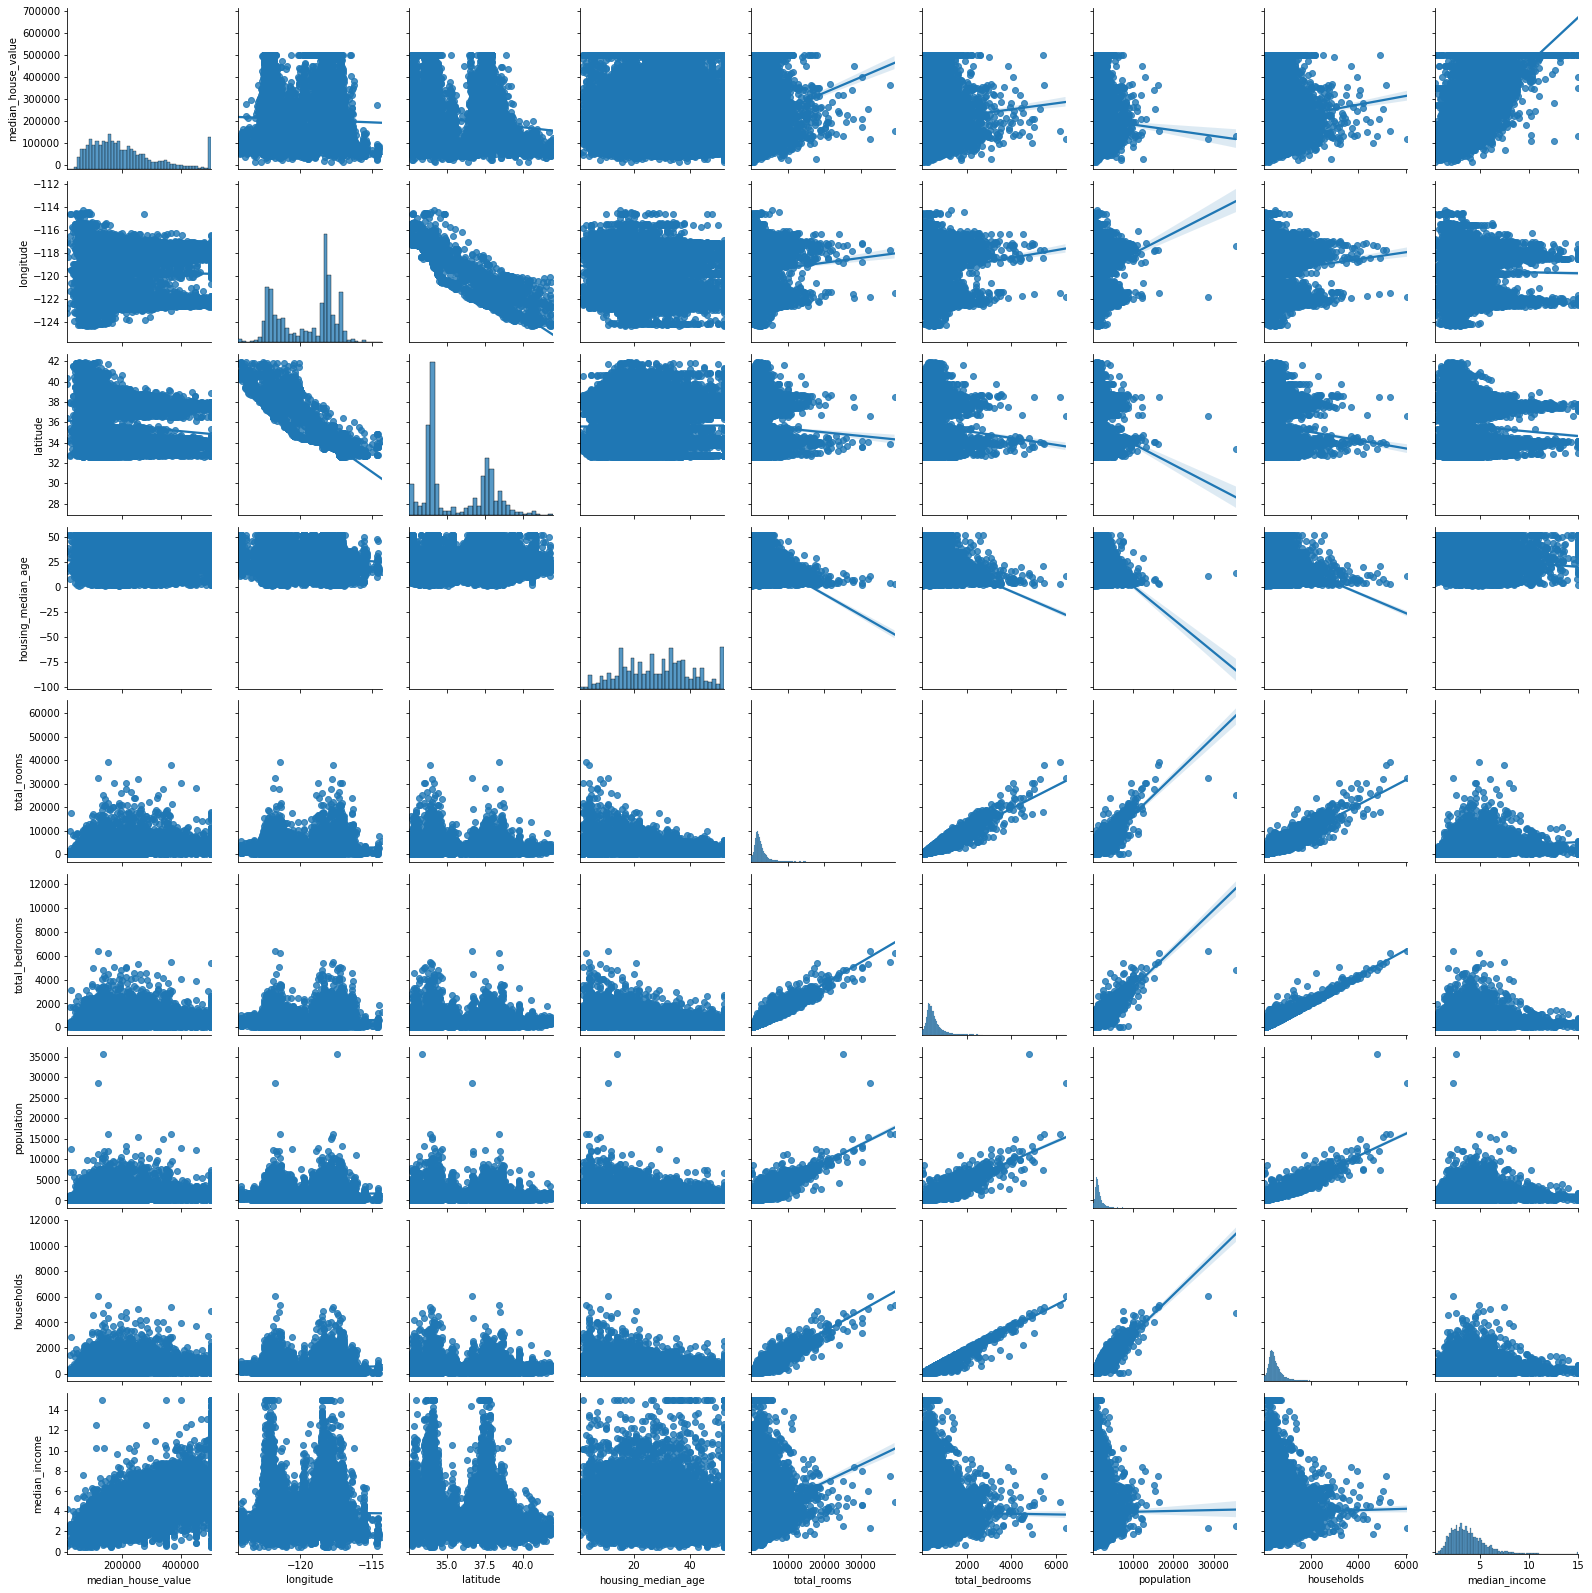

In [33]:
# Creating pairplot
sns.pairplot(plot_df, kind = 'reg', diag_kind = "hist")
plt.show()

### Choosing features from continuous variables

From the correlation heatmap we can see that there are indication of multicolinearity. So, we need to choose the features carefully by considering the correlation value. Latitude has the highest correlation compared to longitude and total rooms has the highest correlation value compared to total_bedrooms, population, and households in correspond to the median house value. Latitude has negative correlation, it means that the higher latitude also followed by the higher median house value. So, the less north the higher median house values. It maybe causes by more closer the house to Los Angeles (LA). Because of that, we can conclude that we'll use these features for the continuous features:

1. latitude,
2. housing_median_age,
3. total_rooms, and
4. median_income

## EDA for categorical feature

In [7]:
# Prepare the data
cat_ft = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
cat_dat = []
for i in range(len(cat_ft)):
    cat_dat.append(housing_shuffled[housing_shuffled[cat_ft[i]] == 1]['median_house_value'])

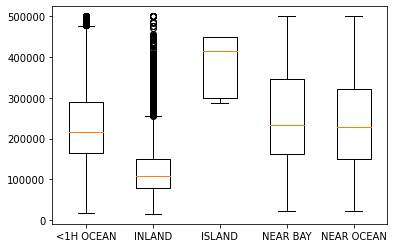

In [35]:
# Create a simple boxplot
plt.boxplot(cat_dat)

locs, labels = plt.xticks()
plt.xticks(locs, cat_ft)
plt.show()

As you can see from the boxplot graph above that each of the category of 'ocean proximity' are different in mean. We can do further analysis using ANOVA for parametric mean hypothesis testing. But first, we need to check the normality of each category data.

In [36]:
# Creating a dictionary of category data
dict_cat_dat = {}
for i, val in enumerate(cat_ft):
    dict_cat_dat[val] = list(cat_dat[i])

# Shapiro wilk test for normality test
for i in dict_cat_dat:
    stat, pval = shapiro(dict_cat_dat[i])
    print("Normality test for", i)
    print('stat=%.3f, p-value=%.3f' % (stat, pval))
    if pval > 0.05:
        print("normal distribute")
    else:
        print("not normal distribute")
    print()


Normality test for <1H OCEAN
stat=0.909, p-value=0.000
not normal distribute

Normality test for INLAND
stat=0.821, p-value=0.000
not normal distribute

Normality test for ISLAND
stat=0.801, p-value=0.083
normal distribute

Normality test for NEAR BAY
stat=0.938, p-value=0.000
not normal distribute

Normality test for NEAR OCEAN
stat=0.933, p-value=0.000
not normal distribute



C:\Users\acer\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


All of the category data is not normal distributed except for ISLAND. So, we'll use nonparametric version of ANOVA which is Kruskal-Wallis test.

In [37]:
# Kruskal wallis test
from scipy import stats

stat, pval = stats.kruskal(
    dict_cat_dat[cat_ft[0]],
    dict_cat_dat[cat_ft[1]],
    dict_cat_dat[cat_ft[2]],
    dict_cat_dat[cat_ft[3]],
    dict_cat_dat[cat_ft[4]],
)

print("| Kruskal Wallis Test |")
print('stat=%.3f, p-value=%.3f' % (stat, pval))
if pval > 0.05:
    print("There's no difference between category")
else:
    print("There are difference between category")

| Kruskal Wallis Test |
stat=6564.966, p-value=0.000
There are difference between category


The result shown above conclude that the kruskal wallis test have the same insight with the boxplot interpretation.

## Selected Features

1. latitude,
2. housing_median_age,
3. total_rooms,
4. median_income, and
5. dummy variables for ocean_proximity

# Modeling

In [10]:
# Splitting the data frame to the Xs and y
# Here, we used all of the available variables as features
X = housing_shuffled.iloc[:, :-1]
y = housing_shuffled.iloc[:, -1]

In [13]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
# Standard scaling ~ N(0,1)
std_scaler = StandardScaler()

def standard_transform(scaler, Xtrain_data, Xtest_data, dummy_var):
  # Training
  Xtrain_std = scaler.fit_transform(Xtrain_data.drop(dummy_var, axis = 1))
  Xtrain_std = pd.DataFrame(Xtrain_std)
  Xtrain_std.columns = [i for i in Xtrain_data.columns if i not in dummy_var]
  
  # Testing
  Xtest_std = scaler.transform(Xtest_data.drop(dummy_var, axis = 1))
  Xtest_std = pd.DataFrame(Xtest_std)
  Xtest_std.columns = [i for i in Xtest_data.columns if i not in dummy_var]

  Xtrain_data = pd.concat([Xtrain_data[dummy_var], Xtrain_std.set_index(Xtrain_data.index)],
                          axis = 1)
  Xtest_data = pd.concat([Xtest_data[dummy_var], Xtest_std.set_index(Xtest_data.index)],
                         axis = 1)
  
  return Xtrain_data, Xtest_data

In [15]:
# Standard scaling variable
X_train, X_test = standard_transform(std_scaler, X_train, X_test, cat_ft)

I did standardization because all of the features has different kinds of scales.

## Linear Regression

In [17]:
# Linear Regression
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     2474.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:55:38   Log-Likelihood:            -2.0524e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
<1H OCEAN           2.188e+05    938

As you can see that the latitude wasn't affect median_house_value significantly in %5 significance level. So we could remove it from the model.

In [18]:
model = sm.OLS(y_train, X_train.drop("latitude", axis = 1))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2577.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:57:31   Log-Likelihood:            -2.0548e+05
No. Observations:               16346   AIC:                         4.110e+05
Df Residuals:                   16334   BIC:                         4.111e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
<1H OCEAN            2.27e+05    875

In [19]:
# Prediction for data train
print("Training Data")
print("RMSE :", mean_squared_error(y_train, result.fittedvalues, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, result.fittedvalues))
print("MAPE :", mean_absolute_percentage_error(y_train, result.fittedvalues) * 100)

Training Data
RMSE : 69689.32348616573
MAE : 50318.12984642057
MAPE : 28.733279627387375


In [21]:
# Prediction for data test
ypred = result.predict(X_test.drop("latitude", axis = 1))

print("Testing Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Testing Data
RMSE : 69826.94439943822
MAE : 50163.4114120573
MAPE : 28.132616140009915


Unfortunately, the residual didn't fulfilled the normal distribution based on the result of Jarque-Bera normality test. Because of that, we couldn't use linear regression for prediction.

## KNN

In [95]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

# Train data
ypred = regressor.predict(X_train)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Training Data
RMSE : 57293.644011238575
MAE : 39437.99219380888
MAPE : 21.488796710022108

Test Data
RMSE : 69665.1741122128
MAE : 48268.478737460246
MAPE : 25.980875982968666


## Decision Tree

In [96]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Train data
ypred = regressor.predict(X_train)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Training Data
RMSE : 0.0
MAE : 0.0
MAPE : 0.0

Test Data
RMSE : 85737.92013403094
MAE : 56752.57964276976
MAPE : 30.847717228050914


There is indication of overfitting in the decision tree regressor with default setting.

## Random Forest

In [98]:
regressor = RandomForestRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Train data
ypred = regressor.predict(X_train)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Training Data
RMSE : 23199.06650688979
MAE : 15625.21985317509
MAPE : 8.634697823202389

Test Data
RMSE : 62483.410966013755
MAE : 42158.462459016395
MAPE : 22.877670719529856


## SVR

In [94]:
regressor = SVR()
regressor.fit(X_train, y_train)

# Train data
ypred = regressor.predict(X_train)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Training Data
RMSE : 117949.35959070336
MAE : 87714.26583771377
MAPE : 52.12069155255501

Test Data
RMSE : 118929.60579414392
MAE : 88629.27031356432
MAPE : 52.648140830335656


## LGBM

In [93]:
regressor = LGBMRegressor()
regressor.fit(X_train, y_train)

# Train data
ypred = regressor.predict(X_train)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Training Data
RMSE : 53996.13777693547
MAE : 37648.90530460015
MAPE : 20.948981525243774

Test Data
RMSE : 59121.4863688733
MAE : 40495.683407495475
MAPE : 22.109913573146667


## Gradient Boosting Regressor

In [92]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

# Train data
ypred = regressor.predict(X_train)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

Training Data
RMSE : 62248.17367891249
MAE : 43903.836277303795
MAPE : 24.220676960882333

Test Data
RMSE : 63342.7448937515
MAE : 44617.073223375475
MAPE : 24.423636557527526


## XGBoost

In [35]:
X_new = X.copy()
X_new.columns = [*list(X.columns[:8]), "less_anhour_ocean", "inland", "island", "near_bay", "near_ocean"]

X_train_new = X_train.copy()
X_train_new.columns = list(X_new.columns)

X_test_new = X_test.copy()
X_test_new.columns = list(X_new.columns)

In [33]:
data_dmatrix = xgb.DMatrix(data = X_new, label = y)

In [39]:
regressor = xgb.XGBRegressor(
    objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10
)
regressor.fit(X_train_new, y_train)

# Train data
ypred = regressor.predict(X_train_new)
print("Training Data")
print("RMSE :", mean_squared_error(y_train, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_train, ypred))
print("MAPE :", mean_absolute_percentage_error(y_train, ypred) * 100)
print()

# Test data
ypred = regressor.predict(X_test_new)
print("Test Data")
print("RMSE :", mean_squared_error(y_test, ypred, squared = False)) # RMSE
print("MAE :", mean_absolute_error(y_test, ypred))
print("MAPE :", mean_absolute_percentage_error(y_test, ypred) * 100)

[17:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Training Data
RMSE : 112250.35849693877
MAE : 78773.41615924767
MAPE : 31.639466124822846

Test Data
RMSE : 113937.11437764767
MAE : 79922.91334471342
MAPE : 31.939806936381547


In [40]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[17:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [41]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,218163.760417,625.741881,218250.479167,1341.558641
1,200151.328125,1134.183165,200181.859375,1469.674660
2,184792.421875,1942.125744,184878.651042,1429.332880
3,171257.026042,2952.917955,171314.635417,2216.320845
4,158855.708333,3513.311488,158881.942708,2983.663402
5,147370.750000,3158.499655,147488.755208,3232.056092
6,138218.375000,3458.865990,138462.338542,3353.450714
7,128018.997396,3029.449744,128365.473958,3125.020691
8,121128.882813,2941.949436,121543.445313,2906.219637
9,114645.588542,3590.161221,115082.921875,3806.247487


# Hyperparameter Tuning

In [42]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63625.70989963456 {'max_features': 2, 'n_estimators': 3}
55125.51394008998 {'max_features': 2, 'n_estimators': 10}
52613.551851266726 {'max_features': 2, 'n_estimators': 30}
59752.95620079698 {'max_features': 4, 'n_estimators': 3}
52727.25167315885 {'max_features': 4, 'n_estimators': 10}
50440.71157025396 {'max_features': 4, 'n_estimators': 30}
58952.43810968205 {'max_features': 6, 'n_estimators': 3}
52130.37577796825 {'max_features': 6, 'n_estimators': 10}
49782.14866693861 {'max_features': 6, 'n_estimators': 30}
58686.67509928977 {'max_features': 8, 'n_estimators': 3}
51924.14688140185 {'max_features': 8, 'n_estimators': 10}
49521.062380943105 {'max_features': 8, 'n_estimators': 30}
62568.23036594806 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53770.28326674784 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59988.555668740846 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52390.008598977874 {'bootstrap': False, 'max_features': 3, 'n_estimators'